In [11]:
import pandas as pd
import spacy
import time
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../reports/similarity/gen_df_clean_similarity_labelled.csv",  delimiter=',', quotechar='"', encoding='utf-8',index_col= 0)

nlp = spacy.load("fr_core_news_lg")
# increase the max text to be displayed
# pd.options.display.max_colwidth = 1000
df.head()

,n_avis,date_avis,date_experience,Société,text_total,text_clean_sentences_neg,text_clean_sentences_pos,text_stop,text_clean_sentences_neg_stop,text_clean_sentences_pos_stop,c_bad_com,c_bad_efficacy,c_good_efficacy,c_good_com,c_good_value,c_bad_value
etoiles,,,,,,,,,,,,,,,,
1,3.0,2023-10-20 03:16:24+00:00,2023-10-19,MaBanqueBNPParibas,"""Orgueil gestionnaire. Ça reste une mauvaise e...",Orgueil gestionnaire. Ça reste une mauvaise ex...,NaN,"""Orgueil gestionnaire . Ça mauvaise expérience...",Orgueil gestionnaire . Ça mauvaise expérience ...,NaN,1,1,0,0,0,1
1,2.0,2023-10-19 13:10:44+00:00,2023-10-19,MaBanqueBNPParibas,"""Mauvaise expérience en agence physique et en ...",Mauvaise expérience en agence physique et en l...,Je change alors pour la banque en ligne avec b...,"""Mauvaise expérience agence physique ligne . M...",Mauvaise expérience agence physique ligne . Ma...,Je change banque ligne beaucoup d ' espoir dig...,1,1,1,0,1,0
5,1.0,2023-10-19 15:41:51+00:00,2023-10-19,MaBanqueBNPParibas,"""Chère agence ,. Chère agence ,je dois bous di...",NaN,Chère agence. Chère agence je dois bous dire q...,"""Chère agence , . Chère agence , dois bous mar...",NaN,Chère agence . Chère agence dois bous mari fid...,0,1,0,1,0,0
1,5.0,2023-10-18 16:13:38+00:00,2023-10-17,MaBanqueBNPParibas,"""Mépris ou incompétence ou les 2. RV pris à l'...",Mépris ou incompétence ou les 2. RV pris à l' ...,Voire les 2,"""Mépris incompétence 2 . RV pris agence Touque...",Mépris incompétence 2 . RV pris l ' agence Tou...,Voire 2,1,0,0,0,0,0
2,4.0,2023-10-17 22:22:10+00:00,2023-10-17,MaBanqueBNPParibas,"""Pas d'imprimé prévu pour transferts de compte...",Pas d' imprimé prévu pour transferts de compte...,NaN,"""Pas imprimé prévu transferts compte compte . ...",Pas d ' imprimé prévu transferts compte compte...,NaN,1,0,0,0,0,1


Visualisation messages labelisés comme services efficaces vs le reste 

Labelisation des messages "services inefficaces"

Visualisation messages labélisés "services efficaces", "services ineficaces" et "mitigés" (à la fois positifs pour services efficace et inefficace)

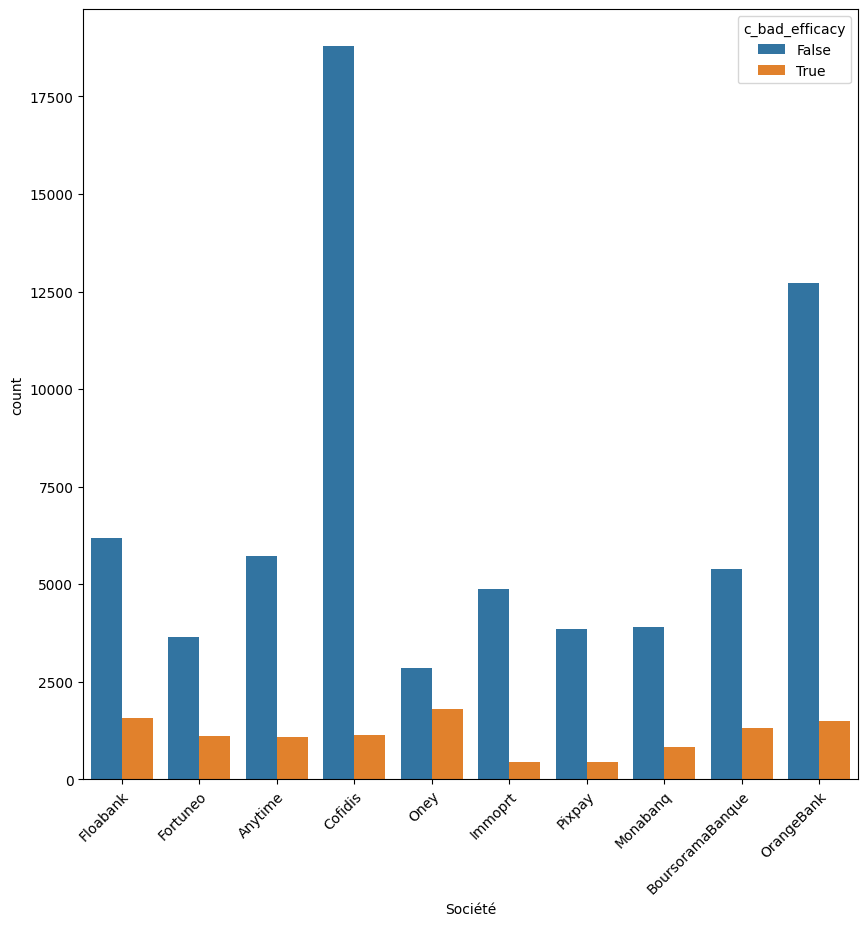

In [13]:
# top_bank topbank
list_top = [bank for bank in df.Société.value_counts().keys()[0:10]]
df_top = df[df['Société'].isin(list_top)]

import seaborn as sns
plt.figure(figsize=(10,10))
ax =sns.countplot(x = df_top.Société, hue = df_top['c_bad_efficacy']== 1)
plt.xticks(rotation=45, ha = 'right', rotation_mode = "anchor");
plt.show()

matched all banks


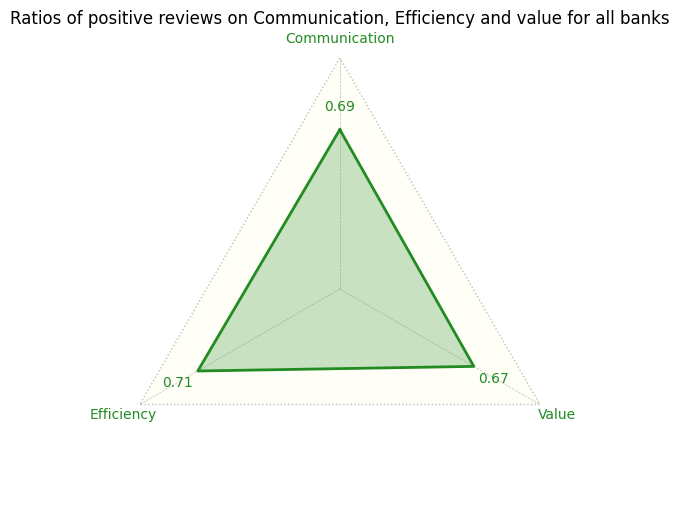

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def pyramid_ratios(df):
    count_good_efficacy = df.c_good_efficacy[df.c_good_efficacy == 1].count()
    count_bad_efficacy = df.c_bad_efficacy[df.c_bad_efficacy == 1].count()
    count_good_com = df.c_good_com[df.c_good_com ==1].count()
    count_bad_com = df.c_bad_com[df.c_bad_com == 1].count()
    count_good_value = df.c_good_value[df.c_good_value == 1].count()
    count_bad_value = df.c_bad_value[df.c_bad_value == 1].count()

    ratio_efficacy = round(count_good_efficacy/(count_good_efficacy+count_bad_efficacy),2)
    ratio_com = round(count_good_com/(count_good_com+count_bad_com),2)
    ratio_value = round(count_good_value/(count_good_value+count_bad_value),2)
    return ratio_com,ratio_efficacy,ratio_value

ratio_com,ratio_efficacy,ratio_value = pyramid_ratios(df)

def pyramid(df, bank="all banks"):
    if bank != "all banks":
        print(f'focusing on bank {bank} ')
        data = df[df.Société == bank]
    else :
        print("matched all banks")
        data = df
    ratio_com,ratio_efficacy,ratio_value = pyramid_ratios(data)
    data_color = "ForestGreen"
    # Define the number of variables and their ratings
    num_vars = 3
    ratings = [ratio_com, ratio_efficacy, ratio_value]  

    # Compute angle for each axis
    angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Rotation to level the triangle
    angles = [angle + pi / 2 for angle in angles]

    # Ratings need to be repeated at the end to close the plot
    ratings = np.concatenate((ratings, [ratings[0]]))

    # Perfect ratings for reference
    perfect_ratings = np.array([1, 1, 1, 1])

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_facecolor('white')

    # Draw one axe per variable and add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['Communication', 'Efficiency', 'Value'], fontsize=10, color=data_color)

    # Draw ylabels
    plt.yticks([], [], color="black", size=8)
    plt.ylim(0, 1)

    # perfect triangle plot
    ax.plot(angles, perfect_ratings, linewidth=1, linestyle=':', color='grey', alpha=0.5)
    ax.fill(angles, perfect_ratings, color='Ivory', alpha=0.5)  # Background color #f0fcf4

    # data plot
    ax.plot(angles, ratings, linewidth=2, linestyle='solid', color=data_color)
    ax.fill(angles, ratings, data_color, alpha=0.25)

    # Remove the polar grid lines for a cleaner look
    ax.spines['polar'].set_visible(False)
    ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

    # adding values at triangle tips
    for angle, rating in zip(angles[:-1], ratings[:-1]):
        ax.text(angle, rating + 0.10, f'{rating:.2f}', ha='center', va='center', fontsize=10, color=data_color)
    plt.title(f"Ratios of positive reviews on Communication, Efficiency and value for {bank}")
    plt.show()

pyramid(df, "all banks")


In [31]:
list_top

['OrangeBank',
 'Cofidis',
 'Floabank',
 'BoursoramaBanque',
 'Fortuneo',
 'Oney',
 'Monabanq',
 'Anytime',
 'Immoprt',
 'LaBanquePostale']

In [48]:
print(df.c_good_value.value_counts(),
df.c_bad_value.value_counts(),
df.c_good_efficacy.value_counts(),
df.c_bad_efficacy.value_counts(),
df.c_good_comm.value_counts(),
df.c_bad_comm.value_counts())


0    10653
1       32
Name: c_good_value, dtype: int64 0    10648
1       37
Name: c_bad_value, dtype: int64 0    8882
1    1803
Name: c_good_efficacy, dtype: int64 0    8002
1    2683
Name: c_bad_efficacy, dtype: int64 0    9178
1    1507
Name: c_good_comm, dtype: int64 0    7564
1    3121
Name: c_bad_comm, dtype: int64


In [17]:
data= df[df.Société == "Cofidis"]
data.c_good_value.value_counts()

0    10879
1     9059
Name: c_good_value, dtype: int64

focusing on bank Oney 


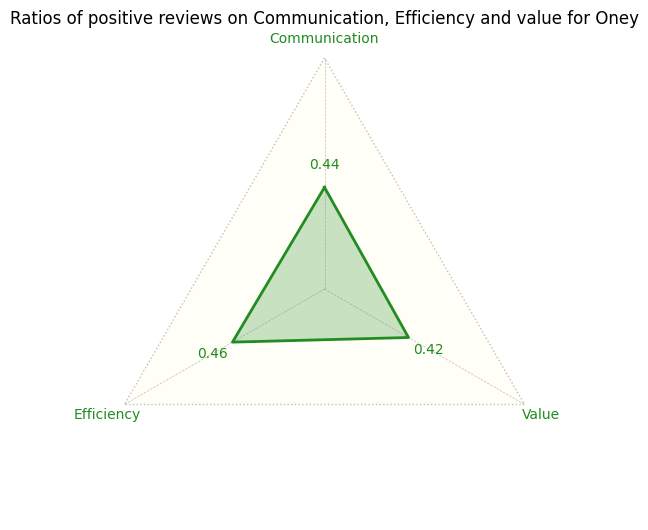

In [18]:
pyramid(df, "Oney")

focusing on bank Cofidis 


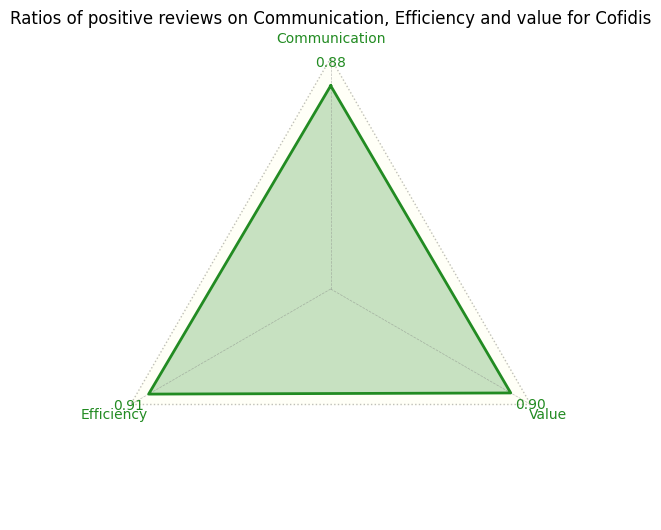

In [19]:
pyramid(df, "Cofidis")

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def pyramid(df, bank="all banks", ax=None):
    if bank != "all banks":
        #print(f'Focusing on bank {bank}')
        data = df[df.Société == bank]
    else:
        print("Matched all banks")
        data = df
    
    ratio_com, ratio_efficacy, ratio_value = pyramid_ratios(data)

    # Define the number of variables and their ratings
    num_vars = 3
    ratings = [ratio_com, ratio_efficacy, ratio_value]
    ratings_sum = sum(ratings)

    if ratings_sum > 2:
        data_color = "ForestGreen"
    elif ratings_sum >1.5:
        data_color = "DarkOrange"
    else:
        data_color = "IndianRed"
    # Compute angle for each axis
    angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Rotation to level the triangle
    angles = [angle + pi / 2 for angle in angles]

    # Ratings need to be repeated at the end to close the plot
    ratings = np.concatenate((ratings, [ratings[0]]))

    # Perfect ratings for reference
    perfect_ratings = np.array([1, 1, 1, 1])

    # Check if an axis is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Set the facecolor and plot
    ax.set_facecolor('white')
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['Communication\n', '\nEfficiency', '\nValue'], fontsize=18, color=data_color)
    
     # Hide circular lines and y-axis labels
    ax.set_yticklabels([])
    ax.yaxis.grid(False)

    # Set the limit for the radial axis
    ax.set_ylim(0, 1)

    # Define a small offset for labels to avoid overlap with high scores
    label_offset = 1.1  # You can adjust this value as needed

    ax.plot(angles, perfect_ratings, linewidth=1, linestyle=':', color='grey', alpha=0.5)
    ax.fill(angles, perfect_ratings, color='Ivory', alpha=0.5)
    # plotting the perfect triangle for visual reference
    ax.plot(angles, ratings, linewidth=2, linestyle='solid', color=data_color)
    ax.fill(angles, ratings, data_color, alpha=0.25)
    ax.spines['polar'].set_visible(False)
    ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.yticks([], [], color="black", size=8)
    plt.ylim(0, 1)

    # Adding values at triangle tips
    for angle, rating in zip(angles[:-1], ratings[:-1]):
        ax.text(angle, rating + 0.10, f'{rating:.2f}', ha='center', va='center', fontsize=14, color=data_color)
    
    # Adding the sum of ratings in bold at the center of the triangle
    ax.text(0, 0, f'{ratings_sum:.2f}', ha='center', va='center', fontsize=25, color= data_color, fontweight='bold')
    ax.set_title(f"Scores for {bank}", size=25)


In [94]:
all_banks =  [bank for bank in df.Société.unique()]
all_banks

['MaBanqueBNPParibas',
 '01BanqueenLigne',
 'Green-Got',
 'BforBank',
 'Hellobank!France',
 'Shine',
 'Helios.do',
 'CarrefourBanque&Assurance',
 'ZELF',
 'LouvreBanquePrive',
 'ips',
 'ChangerMaBanque',
 'Floabank',
 'Plusq1tauxLandesPaysBasque',
 'Fortuneo',
 'FranceSCPI-LesitetoutenlignedelaSCPI',
 'moneywalkie.com',
 'INGFrance',
 'Btocadvice',
 'MoneyNow',
 'Anytime',
 'Cofidis',
 'ConnectBanque',
 'Oney',
 'qui-est-la-banque-la-moins-chere.com',
 'MaFrenchBank',
 'Immoprt',
 'Blank',
 'Pixpay',
 'LabanquepostaleSam',
 'franfinance.fr',
 'Vybe',
 'floapay.com',
 'PennyPet',
 'propulsebyca.fr',
 'Creditmutuel',
 'Monabanq',
 'Kard',
 'CourtiersPrivs',
 'bcfinance.fr',
 'laNef',
 'Cosabnk',
 'LaBanquePostale',
 'LCL',
 'SOFINCO',
 'Paykrom',
 'SolutionBancaire.fr',
 'manager.one',
 'ONLYONE',
 'CASDENBanquePopulaire',
 'CIBFormation',
 'BoursoramaBanque',
 'BoursoBank',
 'OrangeBank',
 'SocitGnrale&Vous']

/var/folders/7m/gxswx1js22x0hszgmzpd29qcg1657r/T/ipykernel_87903/2875400447.py:14: RuntimeWarning: invalid value encountered in long_scalars
  ratio_efficacy = round(count_good_efficacy/(count_good_efficacy+count_bad_efficacy),2)
posx and posy should be finite values
posx and posy should be finite values


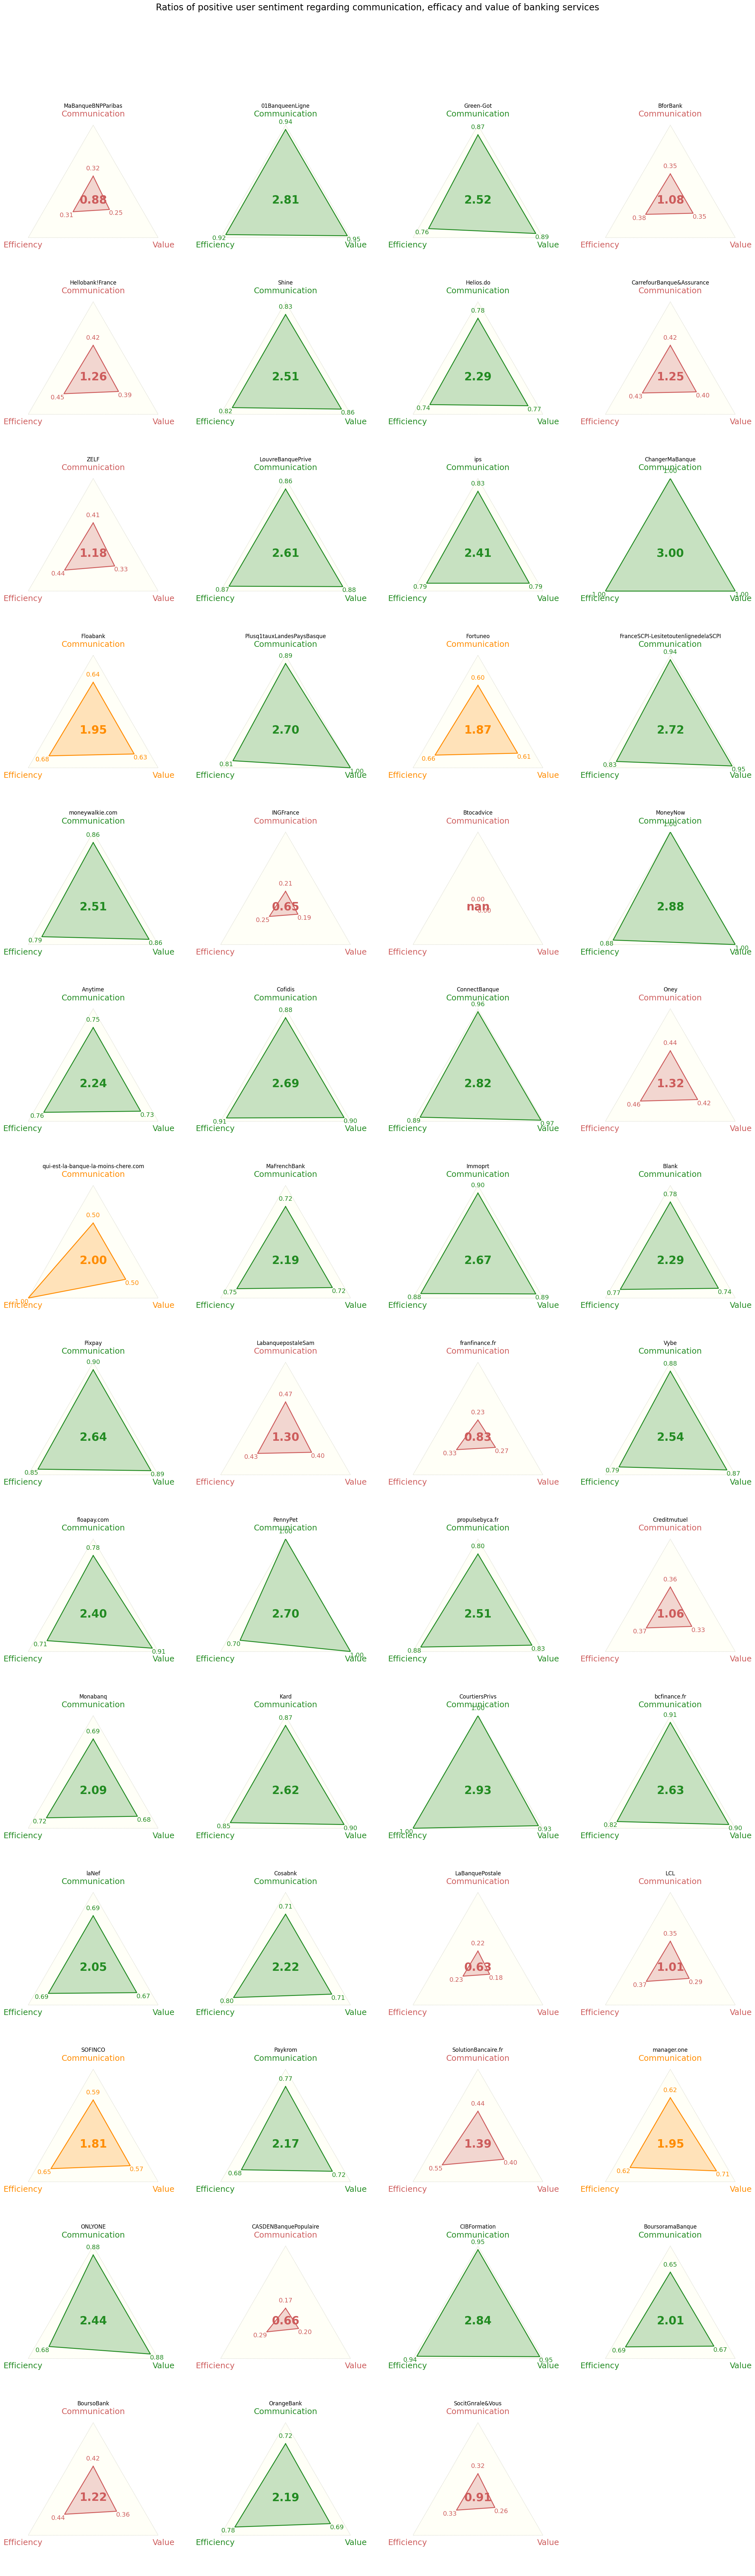

In [130]:
banks = all_banks  # Assuming this is your list of banks
n = len(banks)
cols = 4  # Define the number of columns you want
rows = n // cols + (n % cols > 0)  # Calculate the number of rows needed

fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), subplot_kw=dict(polar=True))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D, if necessary

fig.suptitle('Ratios of positive user sentiment regarding communication, efficacy and value of banking services', fontsize=20)  # Add an overall title

for idx, bank in enumerate(banks):
    ax = axs[idx]
    pyramid(df, bank, ax=ax)
    ax.grid(False)  # Disable the grid for the current ax
    ax.set_yticklabels([])  # Hide the y-axis labels for the current ax
    ax.set_title(f'{bank}', fontsize=12)  # Set individual subplot titles


# If the number of plots is not a perfect multiple of the number of columns, hide the extra axes
for ax in axs[len(banks):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the overall title

plt.show()


Focusing on bank Cofidis
Focusing on bank OrangeBank
Focusing on bank Floabank
Focusing on bank Anytime
Focusing on bank BoursoramaBanque
Focusing on bank Immoprt
Focusing on bank Fortuneo
Focusing on bank Monabanq
Focusing on bank Oney
Focusing on bank Pixpay


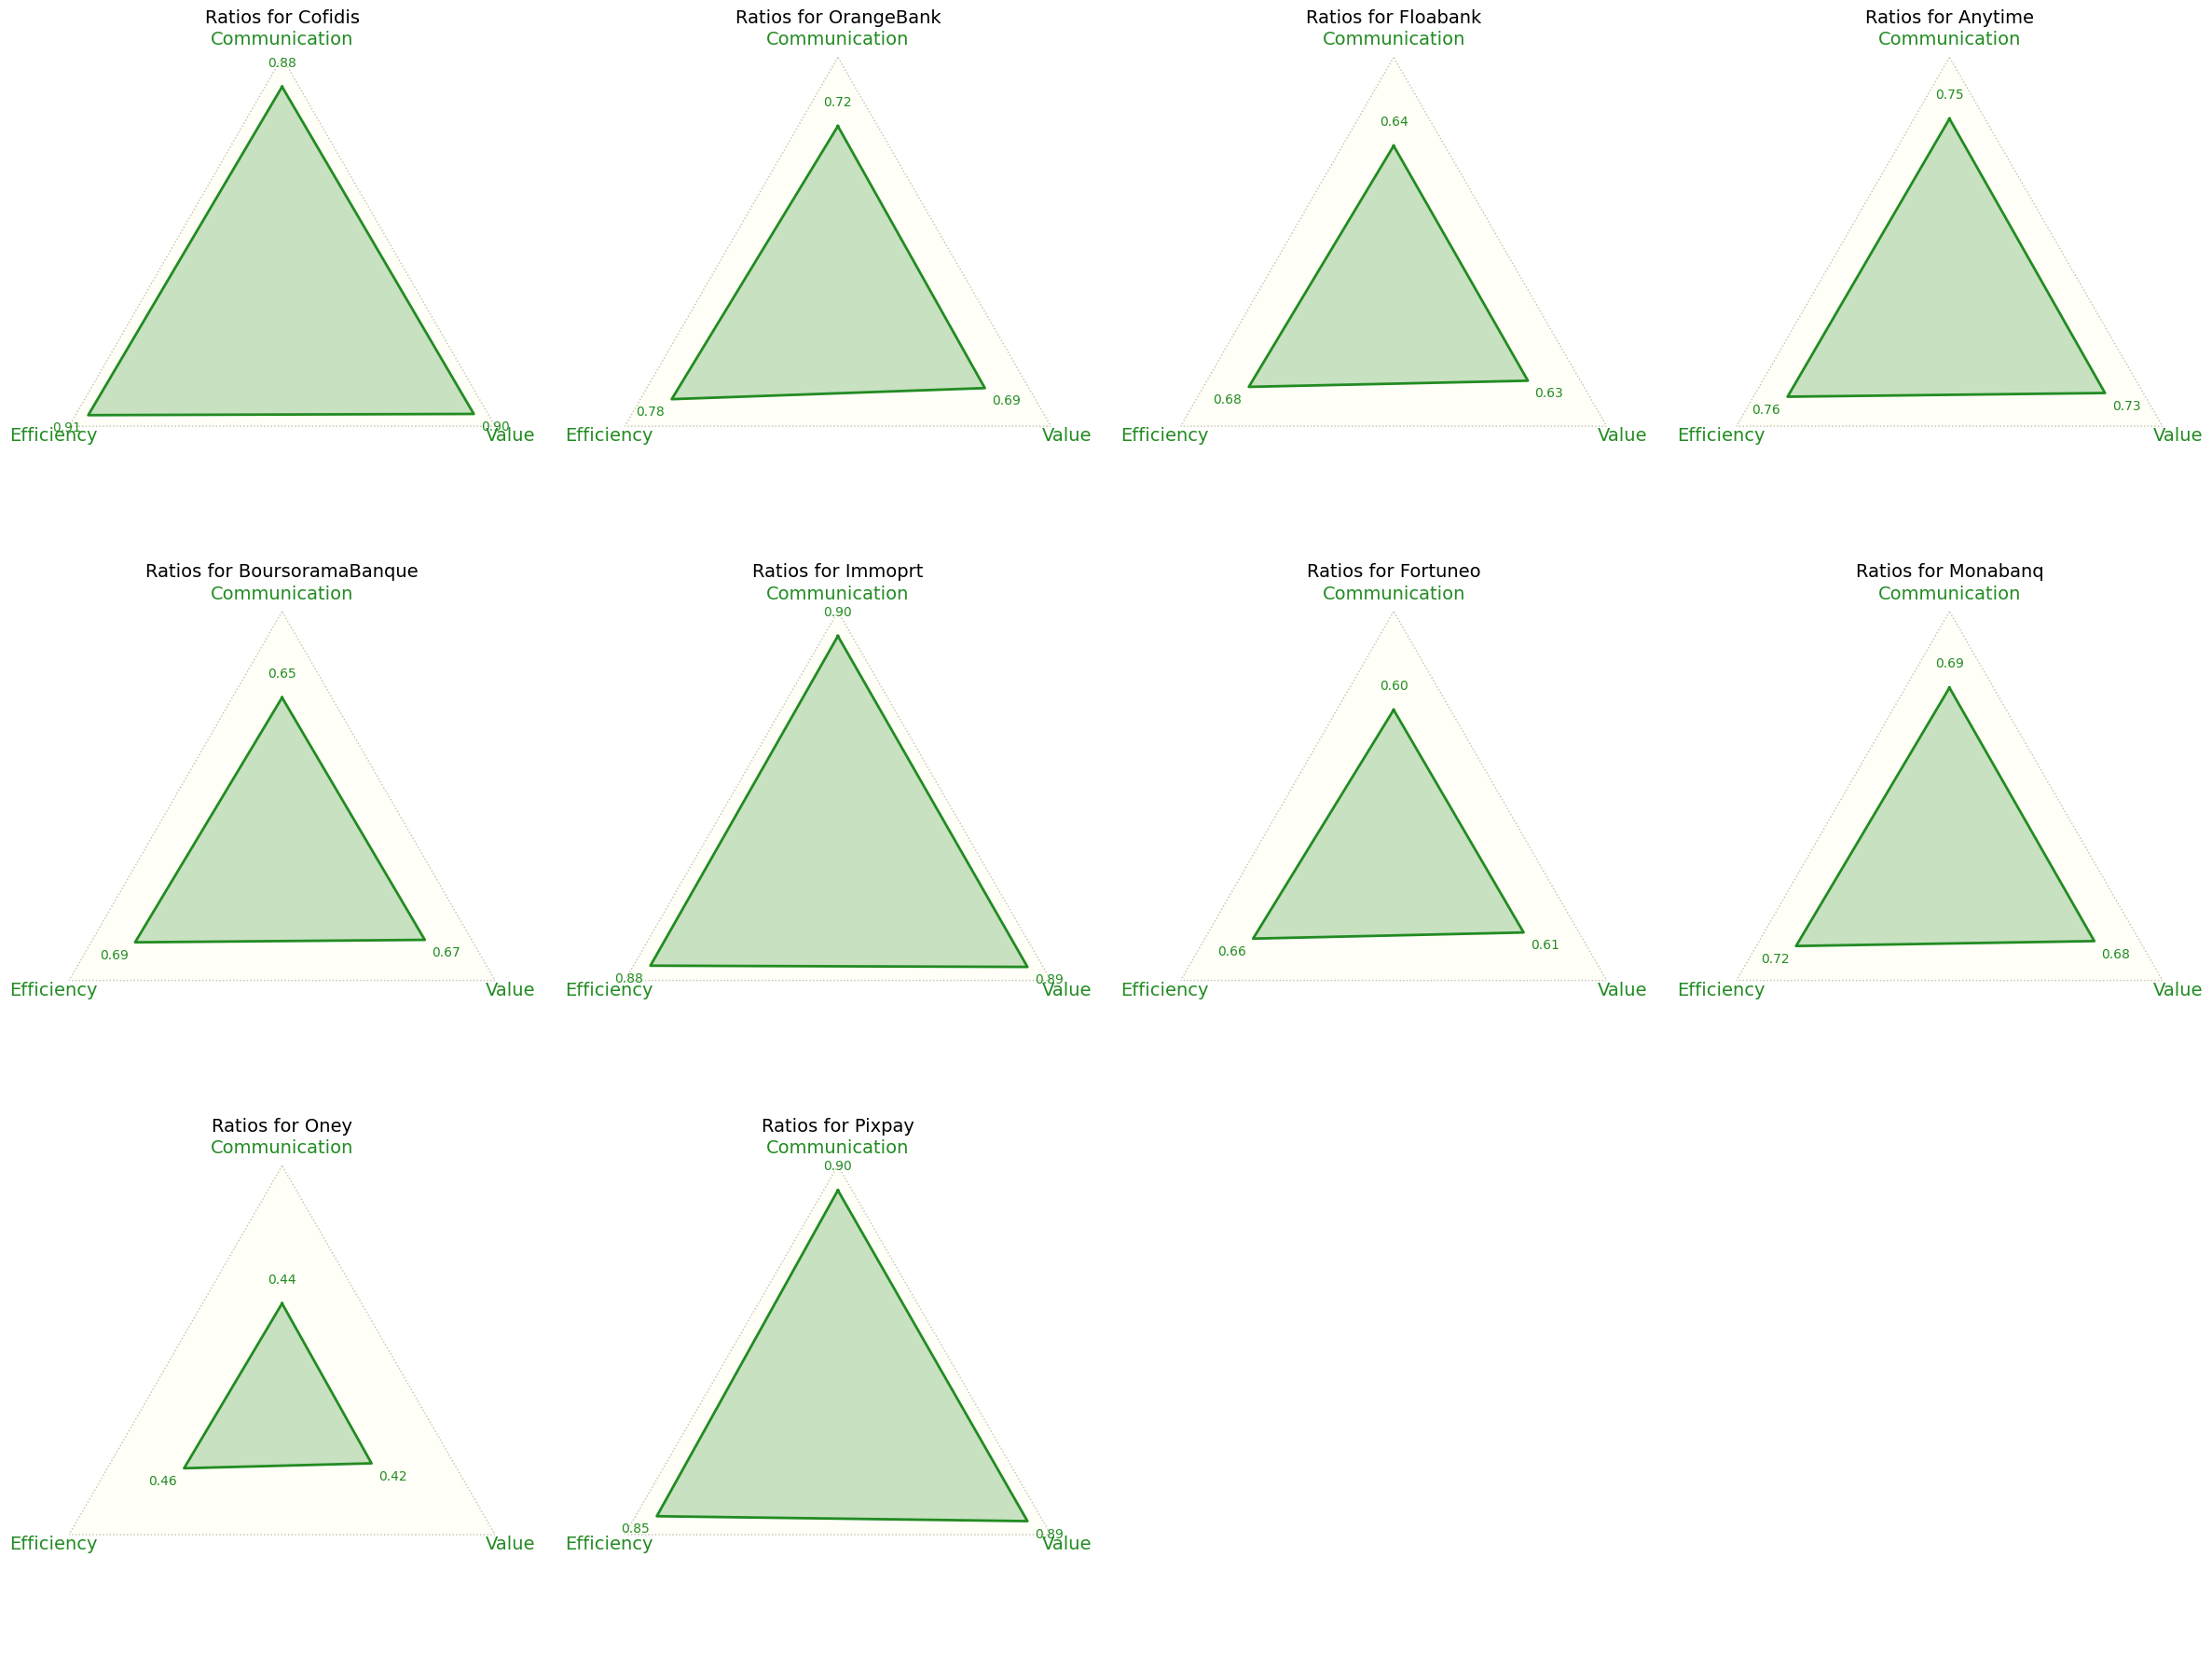

In [61]:
banks = list_top  # Assuming this is your list of banks
n = len(banks)
cols = 4  # Define the number of columns you want
rows = n // cols + (n % cols > 0)  # Calculate the number of rows needed

fig, axs = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), subplot_kw=dict(polar=True))
axs = axs.flatten()  # Flatten the 2D array of axes to 1D, if necessary

for idx, bank in enumerate(banks):
    ax = axs[idx]
    pyramid(df, bank, ax=ax)
    ax.grid(False)  # Disable the grid for the current ax
    ax.set_yticklabels([])  # Hide the y-axis labels for the current ax

# If the number of plots is not a perfect multiple of the number of columns, hide the extra axes
for ax in axs[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()